# Eutrophication Risk

Visualizing the number of at risk basins per country

*Author: Rachel Thoms
<br>Created: 27 Aug 2021
<br>Environment: jupyterlab*

## Style

- Vega chart
- Chart type: bar graph
- Value: number of basins 

## Data

- Data: [ocn_calcs_014_eutrophication_risk](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_014_eutrophication_risk) (full dataset - [wat_059_aqueduct_coastal_eutrophication_potential](https://resourcewatch.carto.com/u/wri-rw/dataset/wat_059_aqueduct_coastal_eutrophication_potential))
- Resource Watch: [explore page](https://resourcewatch.org/data/explore/wat059-Aqueduct-Coastal-Eutrophication-Potential)
- Source: [Aqueduct](https://files.wri.org/d8/s3fs-public/aqueduct-30-updated-decision-relevant-global-water-risk-indicators_1.pdf)

## Preparation

Data was processed using a [python script](https://github.com/rachelthoms/wri-projects/blob/main/ocean-watch/processing-scripts/eutrophication-risk)

### Aliasing and Inserting Data

### Vega

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 200

## Visualization

### Queries

#### Testing

```"data" : "table"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.geostore_prod ILIKE '4c97375ec074beb743fd972130cb1d3b' UNION SELECT gid_0, name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk WHERE gid_0= 'GLB'
```
```"data" : "country"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.geostore_prod ILIKE '4c97375ec074beb743fd972130cb1d3b'
```

#### Parameterized

```"data" : "table"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.{{geostore_env}} ILIKE '{{geostore_id}}' UNION SELECT gid_0, name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk WHERE gid_0= 'GLB
```
```"data" : "country"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.{{geostore_env}} ILIKE '{{geostore_id}}'
```

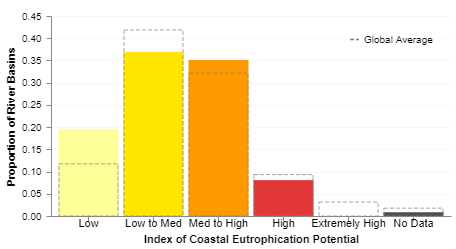

In [9]:
spec=json.loads("""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 400,
  "height": 200,
  "padding": 5,

  "data": [{
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q= SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.geostore_prod ILIKE '4c97375ec074beb743fd972130cb1d3b' UNION SELECT gid_0, name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk WHERE gid_0= 'GLB'",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {"type": "formula",
        "expr": "split((split(datum.cep_label, '(')[1]),')')[0]",
        "as": "range"},
        {"type": "formula",
        "expr": "split(datum.cep_label, '(')[0]",
        "as": "label"},
        
        {"type": "formula",
        "expr": "datum.range === '<-5' ? 1 : datum.range === '-5 to 0' ? 2:  datum.range === '0 to 1' ? 3: datum.range === '1 to 5' ? 4:  datum.range === '>5' ? 5: 6 ",
        "as": "order"},
        {"type": "formula",
        "expr": "datum.order == 2 ? 'Low to Med': datum.order == 3 ? 'Med to High' : datum.label ",
        "as": "label" },
        {"type": "collect", 
        "sort": 
          {"field": ["order"],"order": ["ascending"]}}]},
        {"name": "world",
        "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0, name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk WHERE gid_0= 'GLB'",
      "format": {"type": "json", "property": "rows"},
        "transform": [
        {"type": "formula",
        "expr": "split((split(datum.cep_label, '(')[1]),')')[0]",
        "as": "range"},
        {"type": "formula",
        "expr": "split(datum.cep_label, '(')[0]",
        "as": "label"},
        
        {"type": "formula",
        "expr": "datum.range === '<-5' ? 1 : datum.range === '-5 to 0' ? 2:  datum.range === '0 to 1' ? 3: datum.range === '1 to 5' ? 4:  datum.range === '>5' ? 5: 6 ",
        "as": "order"},
        {"type": "formula",
        "expr": "datum.order == 2 ? 'Low to Med': datum.order == 3 ? 'Med to High' : datum.label ",
        "as": "label" },
        {"type": "collect", 
        "sort": 
          {"field": ["order"],"order": ["ascending"]}}]},
        {"name": "country",
        "url": "https://wri-rw.carto.com/api/v2/sql?q= SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.geostore_prod ILIKE '4c97375ec074beb743fd972130cb1d3b'",
      "format": {"type": "json", "property": "rows"},
        "transform": [
        {"type": "formula",
        "expr": "split((split(datum.cep_label, '(')[1]),')')[0]",
        "as": "range"},
        {"type": "formula",
        "expr": "split(datum.cep_label, '(')[0]",
        "as": "label"},
        
        {"type": "formula",
        "expr": "datum.range === '<-5' ? 1 : datum.range === '-5 to 0' ? 2:  datum.range === '0 to 1' ? 3: datum.range === '1 to 5' ? 4:  datum.range === '>5' ? 5: 6 ",
        "as": "order"},
        {"type": "formula",
        "expr": "datum.order == 2 ? 'Low to Med': datum.order == 3 ? 'Med to High' : datum.label ",
        "as": "label" },
        {"type": "collect", 
        "sort": 
          {"field": ["order"],"order": ["ascending"]}}]}
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    },
    {"name": "gid_0",
    "value": "IND"}
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "label"},
      "range": "width",
      "padding": 0.1,
      "round": true
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "proportion"},
      "nice": true,
      "range": "height"
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "world", "field": "label"},
      "range": ["#ffff99", "#ffe600", "#ff9900", "#E13737", "#bb1133", "#4e4e4e"]
    },
    {
      "name": "line-color",
      "type": "ordinal",
      "domain": [
        "Global Average"
      ]}
  ],

  "axes": [
    { "orient": "bottom", 
    "scale": "xscale",
    "title": "Index of Coastal Eutrophication Potential",
    "titleFont": "Arial",
    "titleFontStyle": "normal",
    "titleFontWeight": 600,
    "titlePadding": 5,
    "labelFont": "Arial",
    "labelFontSize": 11,
    "labelOverlap": true,
    "labelBaseline": "middle",
    "zindex": 4},
    { "orient": "left", 
    "scale": "yscale",
    "title": "Proportion of River Basins",
    "titleFont": "Arial",
    "titleFontStyle": "normal",
    "titleFontWeight": 600,
    "titlePadding": 5,
    "labelFont": "Arial",
    "labelBaseline": "middle",
    "labelAlign": "right",
    "labelPadding": 5,
    "grid": true,
    "gridOpacity": 0.2,
    "zindex": 0}
  ],

  "marks": [ 
    {
      "type": "text",
      "zindex": 2,
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.label", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.proportion", "offset": -2},
          "text": {"signal": "isNumber(tooltip.proportion) ? format(tooltip.proportion, '.2f'): ' ' "},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    },
    {
      "type": "rect",
      "zindex": 1,
      "from": {"data":"world"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "label"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "proportion"},
          "y2": {"scale": "yscale", "value": "0"},
          "stroke": {"value": "grey", "zindex": 0},
          "strokeDash":{"value": [4,2]},
          "strokeWidth": {"value": 0.7},
          "tooltip": {
            "signal": "{'Country': datum.name_0, 'Risk level': datum.label, 'ICEP Range' : datum.range, 'Number of basins': datum.count}"
          }
        },
        "update": {
          "stroke": {"value": "grey"}
        },
        "hover": {
          "stroke": {"value": "gold"}
       }
      }
    },
    
    {
      "type": "rect",
      "from": {"data":"country"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "label"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "proportion"},
          "y2": {"scale": "yscale", "value": 0},
          "fill": {"scale": "color", "field": "label"},
          "stroke": {"scale": "color", "field": "label"},
          "tooltip": {
            "signal": "{'Country': datum.name_0, 'Risk level': datum.label, 'ICEP Range' : datum.range, 'Number of basins': datum.count}"
          }
        },
        "update": {
          "stroke": {"scale": "color", "field": "label"}
        },
        "hover": {
          "stroke": {"value": "gold"}
       }
      }
    }
  ],
  "legends": [
    
    {
      "fill": "line-color",
      "orient": "top-right",
      "encode": {
        "symbols": {
          "update": {
            "size": {"value": 80},
            "stroke": {"value": "grey"},
            "strokeDash":{"value": [4,2]},
            "shape": {
              "value": "stroke"
            }
          }
        }
      }
    }
  ]
}
""")
vegaview=dict(spec)
Vega(vegaview)

# RW API

- [back office](https://resourcewatch.org/admin/data/widgets/34611389-153b-4f24-a687-418e073dd6e0/edit?dataset=d5e7884d-e4dd-47dd-8f28-c5b9c2318a9f)
- parent dataset[]() 
- dataset id ```d5e7884d-e4dd-47dd-8f28-c5b9c2318a9f```
- widget id: ```34611389-153b-4f24-a687-418e073dd6e0```